In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.backends.backend_agg import FigureCanvasAgg

def multi_y_plot(data_dict, x_label=None, ylims=None):

    # colors = [(1,0,1), 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    cmap = plt.get_cmap("tab10")

    # 新しい図と軸を作成
    fig, ax = plt.subplots()

    # 左に軸が追加されるのを回避
    ax.yaxis.set_visible(False)  # 最初のY軸を非表示に

    # X軸のラベルを設定
    if x_label is not None:
        ax.set_xlabel(x_label)

    # グリッドを表示
    ax.grid(True)

    for i, key in enumerate(data_dict):
        ax_tmp = ax.twinx()
        
        ax_tmp.set_ylabel(key, color=cmap.colors[i])
        ax_tmp.plot(data_dict[key][0], data_dict[key][1], color=cmap.colors[i])
        ax_tmp.tick_params(axis='y', labelcolor=cmap.colors[i])

        # Y軸の範囲を設定
        if ylims is not None:
            ax_tmp.set_ylim(ylims[i])

        # # それぞれの軸でグリッドを表示
        # ax_tmp.grid(True, color=colors[i], linestyle='--')

        # スペーサーを追加して、3つ目のy軸を右側に移動
        ax_tmp.spines['right'].set_position(('outward', 70*i))

    # 図を表示
    plt.show()

    return None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


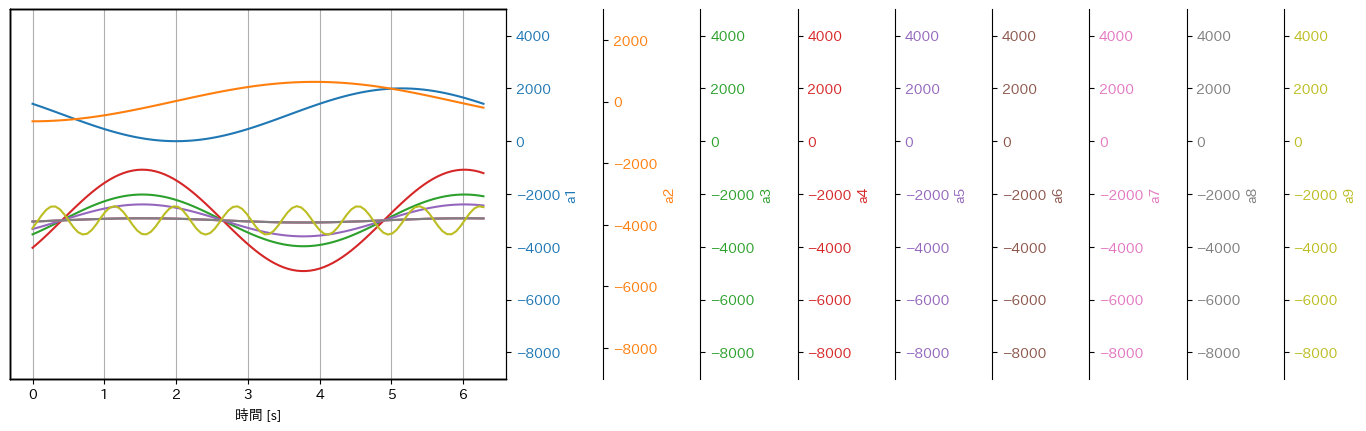

In [71]:
t = np.linspace(0, 2 * np.pi, 100)
a1 = -1 ** 2 * 1000 *np.cos(1 * t - 2) + 1000
a2 = -0.8 ** 2 * 1000 *np.cos(0.8 * t - 0)
a3 = -1.4 ** 2 * 500 *np.cos(1.4 * t - (-1)) - 3000
a4 = -1.4 ** 4 * 500 *np.cos(1.4 * t - (-1)) - 3000
a5 = -1.1 ** 2 * 500 *np.cos(1.4 * t - (-1)) - 3000
a6 = -0.4 ** 2 * 500 *np.cos(1.4 * t - (-1)) - 3000
a7 = -0.4 ** 2 * 500 *np.cos(1.4 * t - (-1)) - 3000
a8 = -0.4 ** 2 * 500 *np.cos(1.4 * t - (-1)) - 3000
a9 = -1.4 ** 5 * 100 *np.cos(7.4 * t - (-1)) - 3000

data_dict = {
    "a1": [t, a1],
    "a2": [t, a2],
    "a3": [t, a3],
    "a4": [t, a4],
    "a5": [t, a5],
    "a6": [t, a6],
    "a7": [t, a7],
    "a8": [t, a8],
    "a9": [t, a9],
}

ylims = [(-9000, 5000), (-9000, 3000), (-9000, 5000), (-9000, 5000), (-9000, 5000), (-9000, 5000), (-9000, 5000), (-9000, 5000), (-9000, 5000)]

multi_y_plot(data_dict, x_label="時間 [s]", ylims=ylims)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


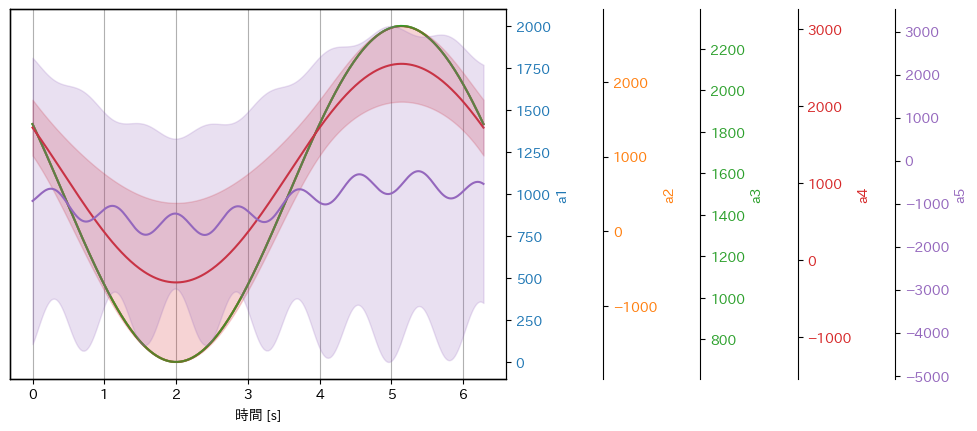

In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.backends.backend_agg import FigureCanvasAgg

def multi_y_plot(data_dict, x_label=None, ylims=None, cmap=plt.get_cmap("tab10")):

    fig, ax = plt.subplots()
    ax.yaxis.set_visible(False)  # 最初のY軸を非表示に
    if x_label is not None:
        ax.set_xlabel(x_label)
    ax.grid(True)

    for i, key in enumerate(data_dict):
        ax_tmp = ax.twinx()
        
        ax_tmp.set_ylabel(key, color=cmap.colors[i])
        # ax_tmp.plot(data_dict[key][0], data_dict[key][1], color=cmap.colors[i])
        sns.lineplot(x=data_dict[key][0], y=data_dict[key][1], color=cmap.colors[i], errorbar='sd')
        ax_tmp.tick_params(axis='y', labelcolor=cmap.colors[i])

        if ylims is not None:
            ax_tmp.set_ylim(ylims[i])

        ax_tmp.spines['right'].set_position(('outward', 70*i))

    plt.show()
    return None

t = np.linspace(0, 2 * np.pi, 300)
a1 = -1.0 ** 2 * 1000 *np.cos(1 * t - 2) + 1000
a2 = -1.5 ** 2 * 1000 *np.cos(1 * t - 2) + 500
a3 = -0.9 ** 2 * 1000 *np.cos(1 * t - 2) + 1500
a4 = -0.9 ** 2 * 2000 *np.cos(1 * t - 2) + 1500
a5 = -1.4 ** 5 * 100 *np.cos(7.4 * t - (-1)) - 3000

data_dict = {
    "a1": [t, a1],
    "a2": [t, a2],
    "a3": [t, a3],
    "a4": [np.concatenate([t, t, t, t]), np.concatenate([a1, a2, a3, a4])],
    "a5": [np.concatenate([t, t]), np.concatenate([a1, a5])],
}

multi_y_plot(data_dict, x_label="時間 [s]")